In [29]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import time

# Generate noisy signal

Data saved to 'data.csv'


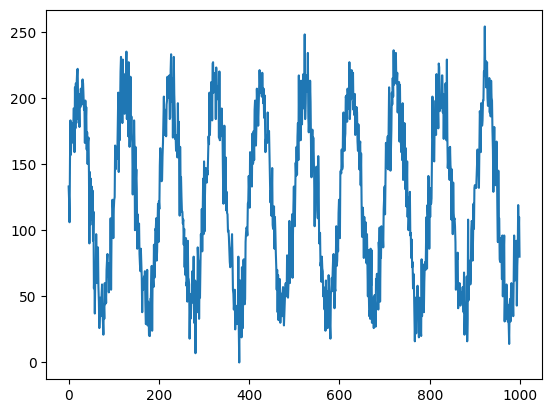

In [21]:
# Parameters
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector from 0 to 1 second with 1/fs spacing
f = 10  # Frequency of the sinusoid (Hz)
A = 1  # Amplitude of the sinusoid
noise_level = 0.2  # Level of noise

# Generate sinusoid
sinusoid = A * np.sin(2 * np.pi * f * t)

# Generate noise
noise = noise_level * np.random.randn(len(t))  # Gaussian noise with zero mean and unit variance

# Add noise to sinusoid
noisy_signal = sinusoid + noise

# Scale the data to be in the range of 0-255
scaled_signal = (noisy_signal - np.min(noisy_signal)) / (np.max(noisy_signal) - np.min(noisy_signal)) * 254

# Convert the data to integers
scaled_signal_int = scaled_signal.astype(int)

# Save data to file
np.savetxt('data.csv', scaled_signal_int, fmt='%d', delimiter='\n')

print("Data saved to 'data.csv'")

plt.plot(scaled_signal_int, linestyle='-')
plt.show()

# Python moving average filter

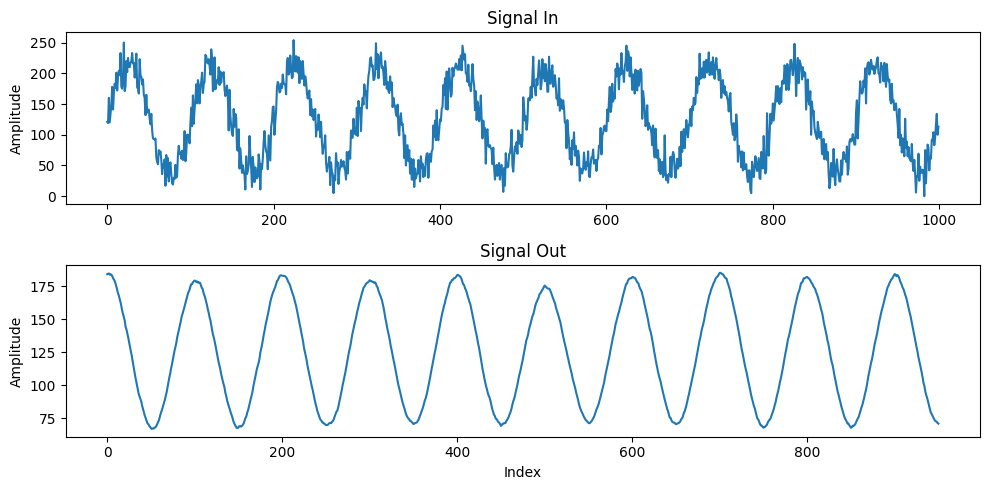

In [13]:
def moving_average(data, window_size):
    """Apply moving average filter to data."""
    weights = np.repeat(1.0, window_size) / window_size
    return np.convolve(data, weights, 'valid')

# Generate example data
#x = np.linspace(0, 10, 100)
#y = np.sin(x) + np.random.normal(0, 0.1, 100)  # Noisy sinusoidal data

# Read data from file
data_file = "data.csv"
with open(data_file, "r") as file:
    lines = file.readlines()

# Extract x and y coordinates
x = []
y = []
for line in lines:
    parts = line.split()
    x.append(int(parts[0]))

# Apply 2nd order smoothing filter (moving average)
window_size = 50  # Adjust window size as needed
smoothed_x = moving_average(x, window_size)


# Plot signals on subplots
plt.figure(figsize=(10, 5))  # Adjust the figure size if needed
plt.subplot(2, 1, 1)
plt.plot(x, linestyle='-')
plt.title('Signal In')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(smoothed_x, linestyle='-')
plt.title('Signal Out')
plt.xlabel('Index')
plt.ylabel('Amplitude')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

# VERILOG moving average filter

In [42]:
# Compile Verilog files
compile_process = subprocess.run(["iverilog", "-g", "2012", "-o", "l", "sf.sv", "sf_tb.sv"], capture_output=True, text=True)

# Check if compilation was successful
if compile_process.returncode == 0:
    print("Compilation successful.")
else:
    print("Compilation failed.")
    print(compile_process.stderr)  # Print any error message from the compilation process

# Run the compiled file
if compile_process.returncode == 0:
    start_time = time.time()
    run_process = subprocess.run(["vvp", "l"], capture_output=True, text=True)
    end_time = time.time()

    # Print the output of the simulation
    print("Simulation output:")
    print(run_process.stdout)
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

# Read data from file
data_file = "data.csv"
with open(data_file, "r") as file:
    lines = file.readlines()
d = []
for line in lines:
    d.append(int(line))
indices_d = range(len(d))

# Read data from file
data_file = "output.csv"
with open(data_file, "r") as file:
    lines = file.readlines()
o = []
for line in lines:
    o.append(int(line))
indices_o = range(len(o))

# Plot signals on subplots
plt.figure(figsize=(10, 5))  # Adjust the figure size if needed
plt.subplot(2, 1, 1)
plt.plot(indices_d, d, linestyle='-')
plt.title('Signal In')
plt.ylabel('Amplitude')
plt.ylim(0, 255)  # Set y-axis limits

plt.subplot(2, 1, 2)
plt.plot(indices_o, o, linestyle='-')
plt.title('Signal Out')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.ylim(0, 255)  # Set y-axis limits

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()




Compilation successful.
Simulation output:
SF module reset
Applying filter
sf_tb.sv:32: $finish called at 51210000 (1ps)

Execution time: 0.10363316535949707 seconds


ValueError: invalid literal for int() with base 10: '132.000000\n'

# Using Savitsky-Golay

### Running VERILOG script and plotting result

In [45]:
# Compile Verilog files
compile_process = subprocess.run(["iverilog", "-g", "2012", "-o", "l", "sg_h15.sv", "sg_tb.sv"], capture_output=True, text=True)

# Check if compilation was successful
if compile_process.returncode == 0:
    print("Compilation successful.")
else:
    print("Compilation failed.")
    print(compile_process.stderr)  # Print any error message from the compilation process

# Run the compiled file
if compile_process.returncode == 0:
    start_time = time.time()
    run_process = subprocess.run(["vvp", "l"], capture_output=True, text=True)
    end_time = time.time()
    
    # Print the output of the simulation
    print("Simulation output:")
    print(run_process.stdout)

execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Compilation successful.
Simulation output:
SF module reset
sg_tb.sv:32: $finish called at 51210000 (1ps)

Execution time: 0.054671525955200195 seconds


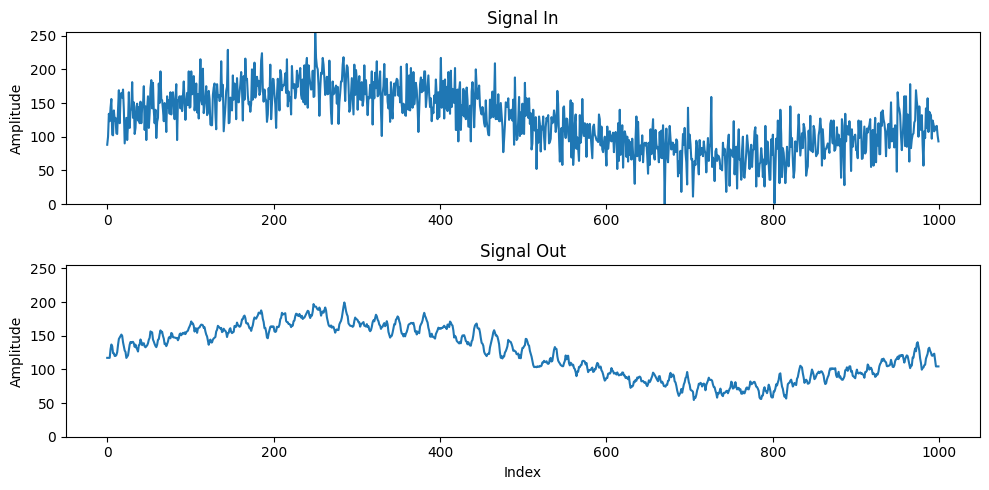

In [46]:

# Read data from file
data_file = "data.csv"
with open(data_file, "r") as file:
    lines = file.readlines()
d = []
for line in lines:
    d.append(int(line))
indices_d = range(len(d))

# Read data from file
data_file = "output.csv"
with open(data_file, "r") as file:
    lines = file.readlines()
o = []
for line in lines:
    o.append(float(line))
indices_o = range(len(o))

# Plot signals on subplots
plt.figure(figsize=(10, 5))  # Adjust the figure size if needed
plt.subplot(2, 1, 1)
plt.plot(indices_d, d, linestyle='-')
plt.title('Signal In')
plt.ylabel('Amplitude')
plt.ylim(0, 255)  # Set y-axis limits

plt.subplot(2, 1, 2)
plt.plot(indices_o, o, linestyle='-')
plt.title('Signal Out')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.ylim(0, 255)  # Set y-axis limits

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()